* Making software prototypes should be part of the design process
* It's never too early to start writing software
* Try things out IRL to see what works and what doesn’t
* Don’t worry about conforming with best practices. Just get something out there
* Find existing software that are in your problem space, try them out and make a list of the itches they don’t scratch
    - [QC Design](https://www.qc.design/): Quantum startups that designs FTQC
    - [They have an Open Source package to do this](https://github.com/qc-design/plaquette)


In [1]:
!pip install plaquette -q --pre


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


A run through of Plaquette's [Surface code tutorial](https://docs.plaquette.design/en/latest/qec_tutorials/intro_and_codes/intro_and_codes.html#surface-codes). The comments in this notebook track features I wish Plaquette had.

In [2]:
from plaquette.codes import LatticeCode
from plaquette import visualizer
from plaquette.errors import QubitErrorsDict
from plaquette.circuit.generator import generate_qec_circuit
from plaquette.device import Device

In [3]:
LatticeCode.make_planar?

Signature: LatticeCode.make_planar(n_rounds: int, size: int)
Docstring:
Create Planar surface code.

Args:
    n_rounds: Number of rounds of stabilizer measurements.
    size: Size of the code (edge length of the square lattice).
File:      ~/tqec_venv/lib/python3.11/site-packages/plaquette/codes/__init__.py
Type:      method

In [4]:
# Is the size of the code the distance? Looks like "Yes"
planar_code = LatticeCode.make_planar(size=3, n_rounds=1)

In [5]:
# Wish making the visualizer had a graphical UI for robust interactivity
vis = visualizer.LatticeVisualizer(planar_code)

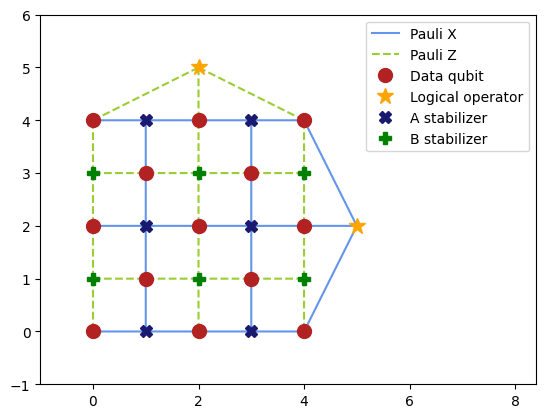

In [6]:
# LatticeCode object too low level. Needs the tiling abstraction on top of it
vis.draw_lattice_mpl()  

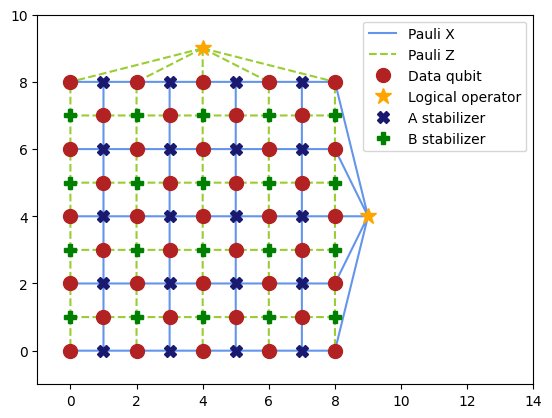

In [7]:
planar_code = LatticeCode.make_planar(size=5, n_rounds=2)
vis = visualizer.LatticeVisualizer(planar_code)
vis.draw_lattice_mpl() 

In [8]:
qed = {"pauli": {q: {"x": 0.05, "y": 1e-15, "z": 1e-15} for q in range(len(planar_code.lattice.dataqubits))},
       "erasure": {q: {"p": 0.01} for q in range(len(planar_code.lattice.dataqubits))},}

In [9]:
logical_operator="Z"
circuit = generate_qec_circuit(planar_code, qed, {}, logical_operator)

In [10]:
circuit

In [13]:
# You can use Plaquette uses Stim!
device = Device("stim")
device.run(circuit)